# PROJEK

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv(r'data\ispu_dki_all.csv')
df.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2010-01-01,DKI1 (Bunderan HI),60.0,NaN,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),32.0,NaN,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27.0,NaN,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22.0,NaN,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25.0,NaN,2.0,17.0,15.0,8.0,25.0,PM10,BAIK


## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4626 non-null   object 
 1   stasiun   4626 non-null   object 
 2   pm10      4466 non-null   float64
 3   pm25      723 non-null    float64
 4   so2       4607 non-null   float64
 5   co        4618 non-null   float64
 6   o3        4621 non-null   float64
 7   no2       4618 non-null   float64
 8   max       4626 non-null   float64
 9   critical  4625 non-null   object 
 10  categori  4626 non-null   object 
dtypes: float64(7), object(4)
memory usage: 397.7+ KB


In [ ]:
df.describe()

,pm10,pm25,so2,co,o3,no2,max
count,4466.000000,723.000000,4607.000000,4618.000000,4621.000000,4618.000000,4626.000000
mean,65.086879,94.374827,28.183851,30.263534,86.586670,18.120832,99.432123
std,19.243150,27.427553,13.822107,13.640344,50.295879,8.451605,43.284775
min,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,76.000000,18.000000,21.000000,51.000000,13.000000,70.000000
50%,64.000000,94.000000,27.000000,29.000000,78.000000,17.000000,91.000000
75%,75.000000,111.000000,34.000000,37.000000,110.000000,21.000000,118.000000
max,179.000000,287.000000,126.000000,134.000000,314.000000,134.000000,314.000000


In [ ]:
df['categori'].value_counts()

categori
SEDANG                2574
TIDAK SEHAT           1568
BAIK                   280
SANGAT TIDAK SEHAT     202
BERBAHAYA                1
TIDAK ADA DATA           1
Name: count, dtype: int64

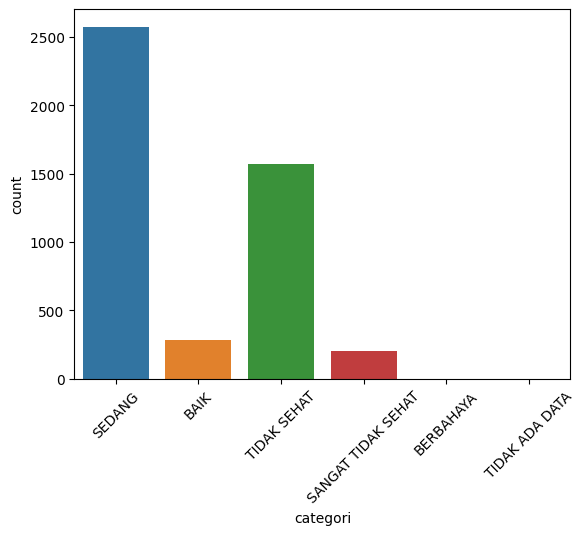

In [ ]:
df['categori'].value_counts()
sns.countplot(x='categori', data=df,  hue='categori')
plt.xticks(rotation=45)
plt.show()

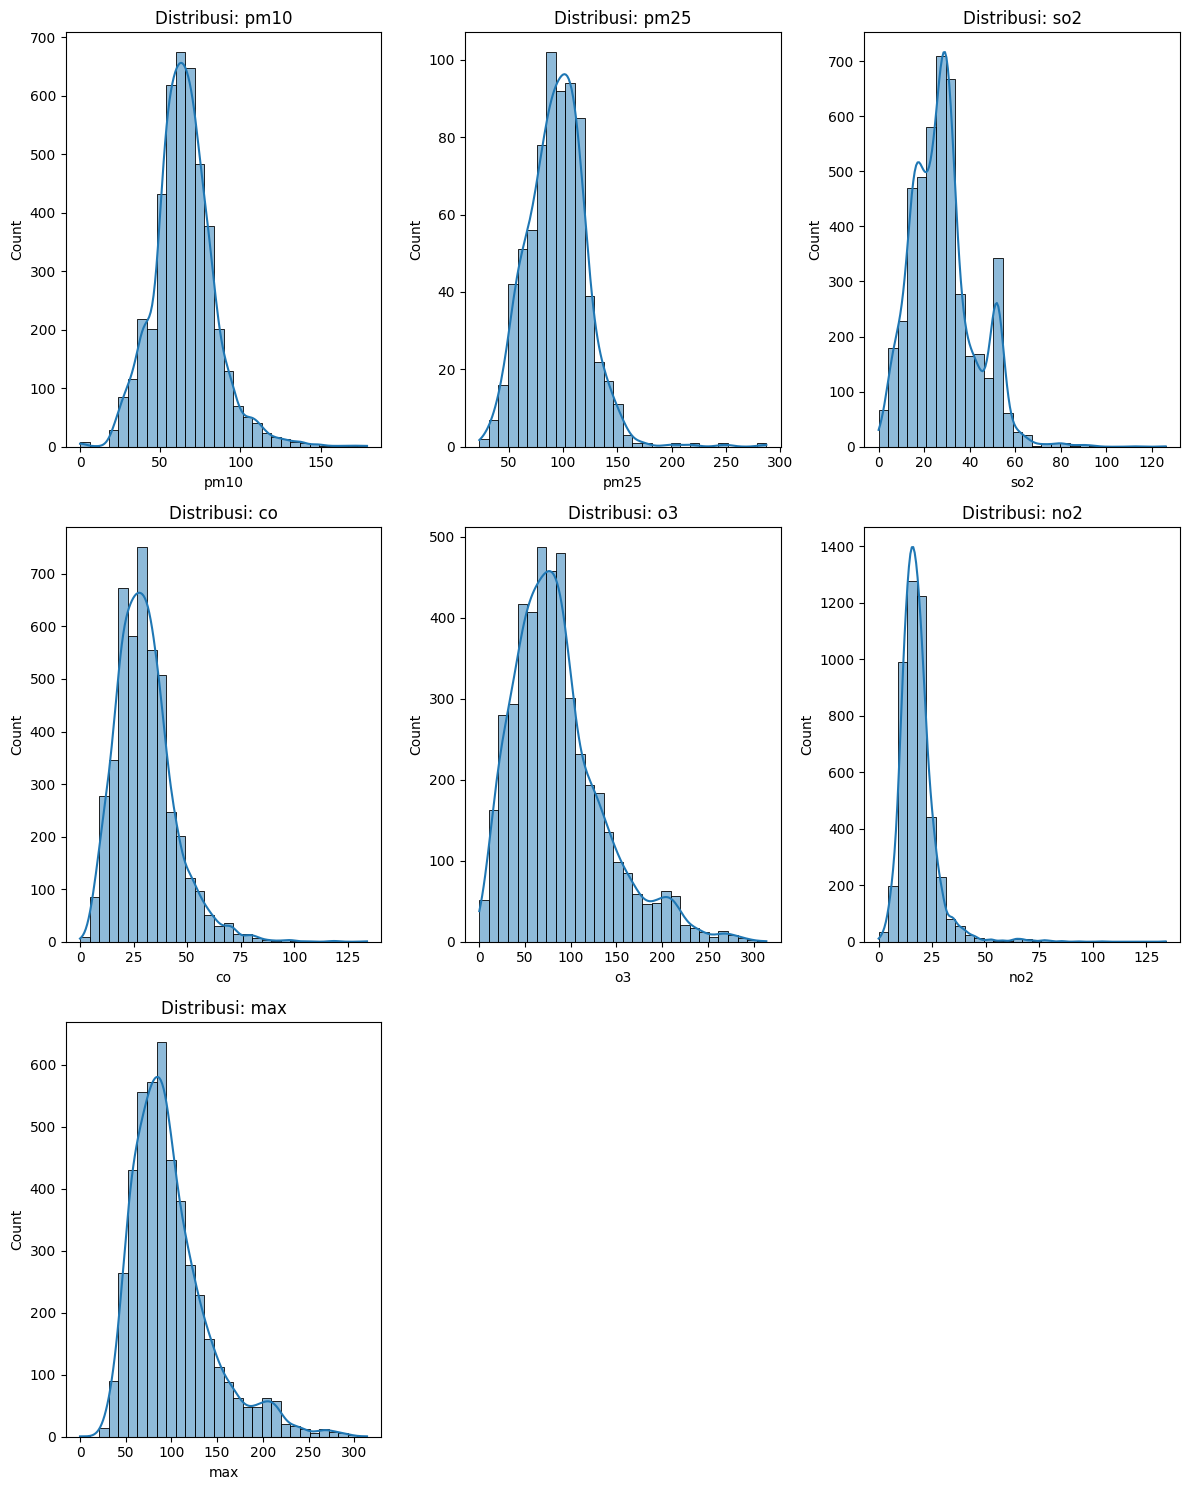

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = df.select_dtypes(include=['number']).columns
cols = 3
rows = (len(num_features) // cols) + (len(num_features) % cols > 0)
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 5 * rows))
axes = axes.flatten()
for i, feature in enumerate(num_features):
    sns.histplot(df[feature], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribusi: {feature}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


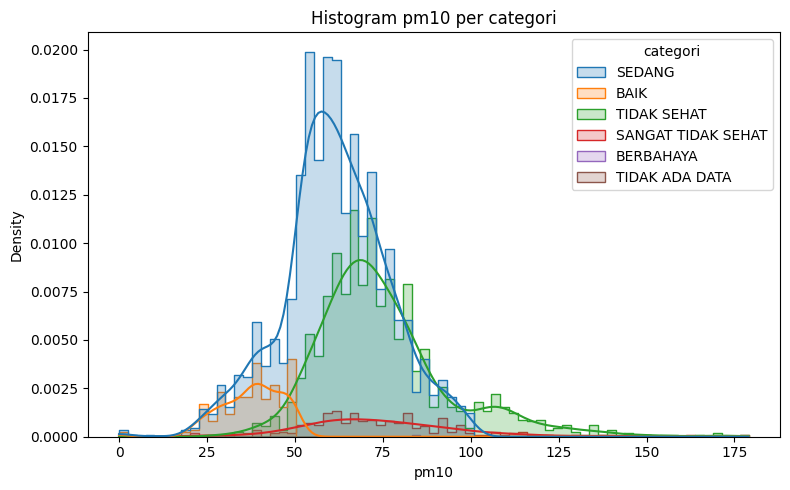

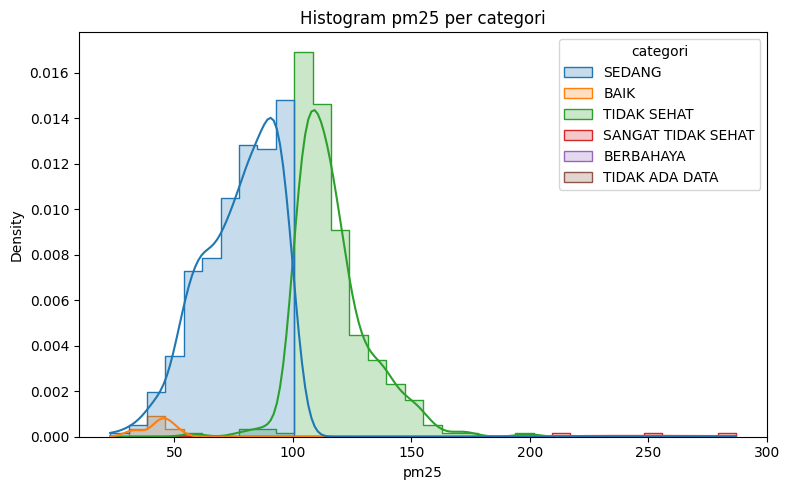

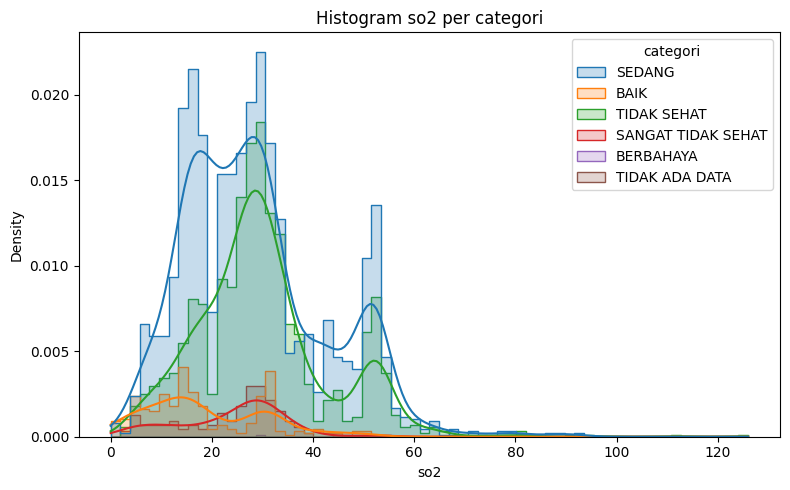

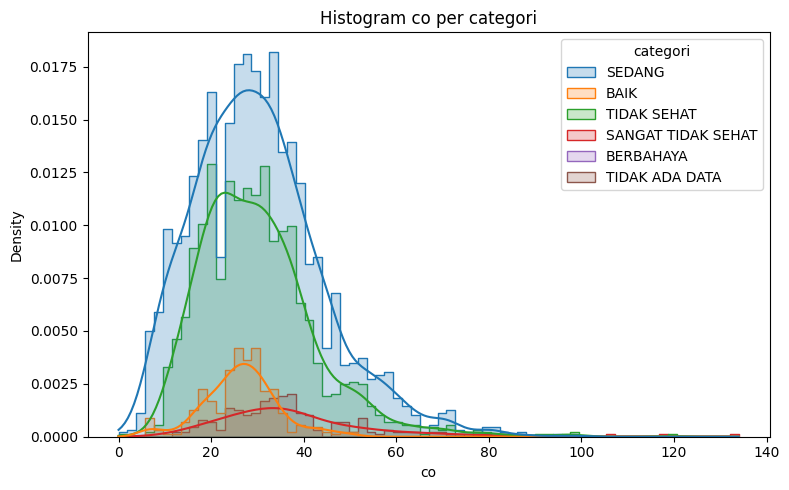

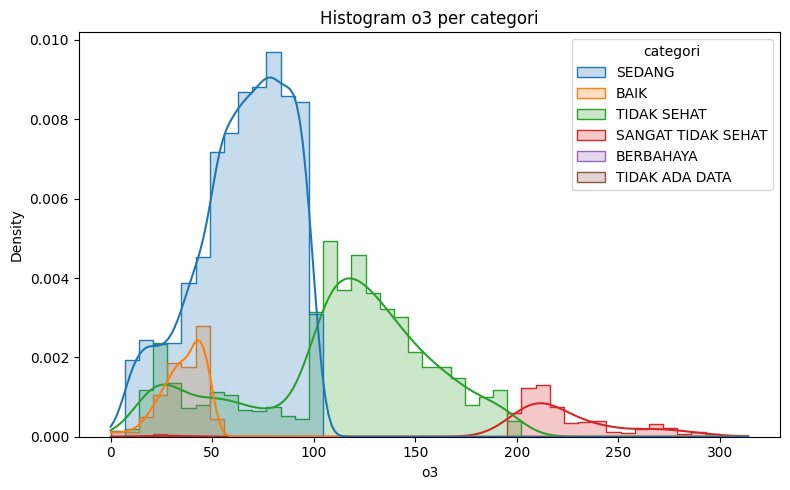

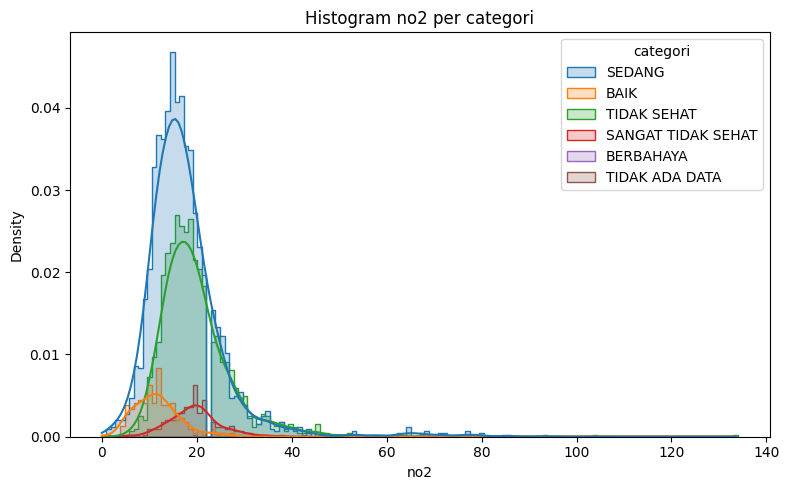

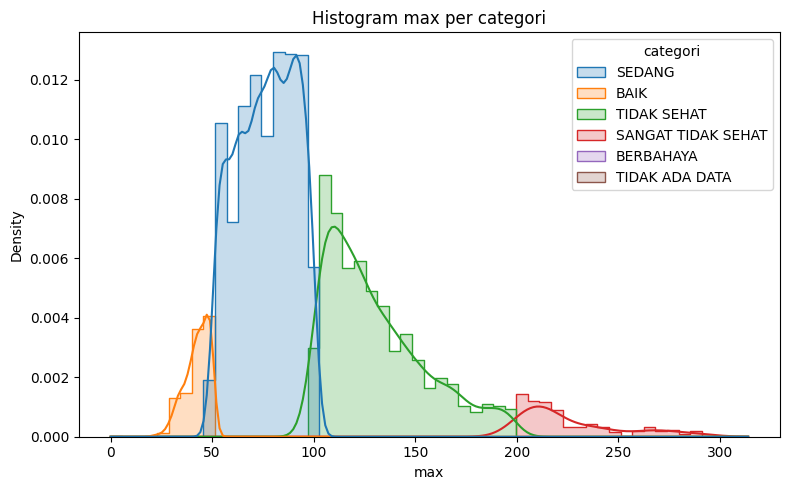

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fitur_numerik = df.select_dtypes(include='number').columns.tolist()
for fitur in fitur_numerik:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=fitur, hue='categori', kde=True, element='step', stat='density')
    plt.title(f"Histogram {fitur} per categori")
    plt.xlabel(fitur)
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()


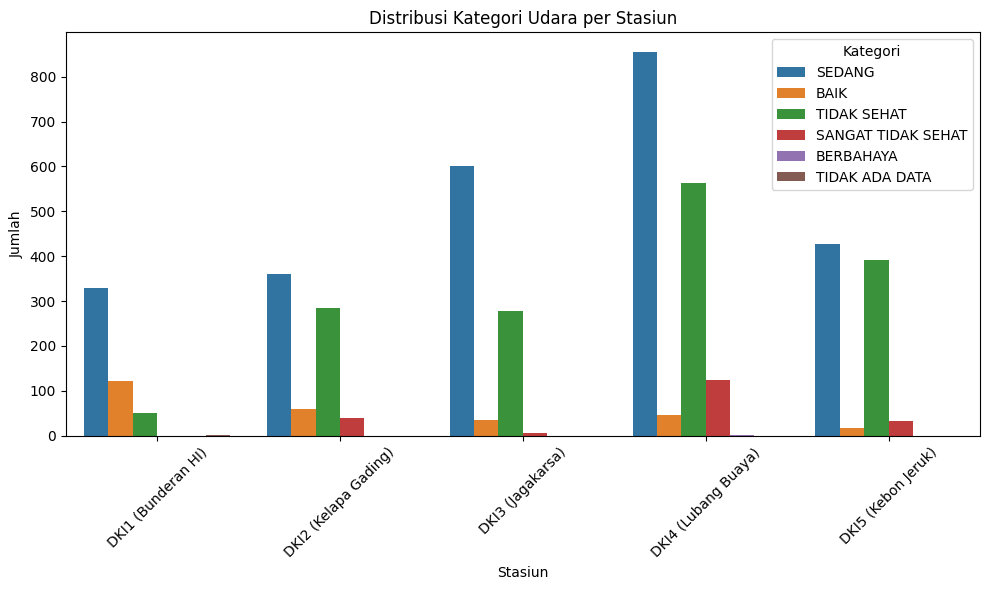

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='stasiun', hue='categori')
plt.title("Distribusi Kategori Udara per Stasiun")
plt.xlabel("Stasiun")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.legend(title='Kategori')
plt.tight_layout()
plt.show()

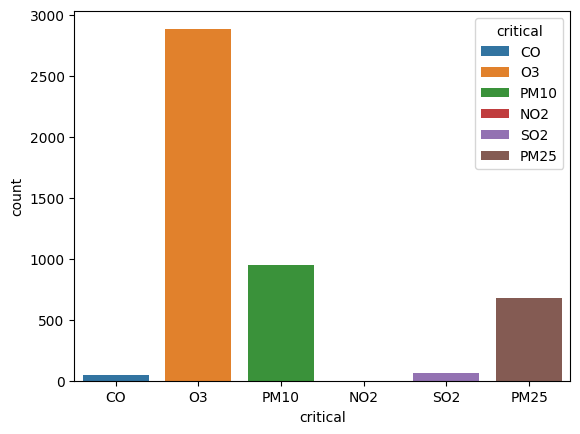

In [ ]:
df['critical'].value_counts()
sns.countplot(x='critical', data=df , hue='critical')
plt.show()

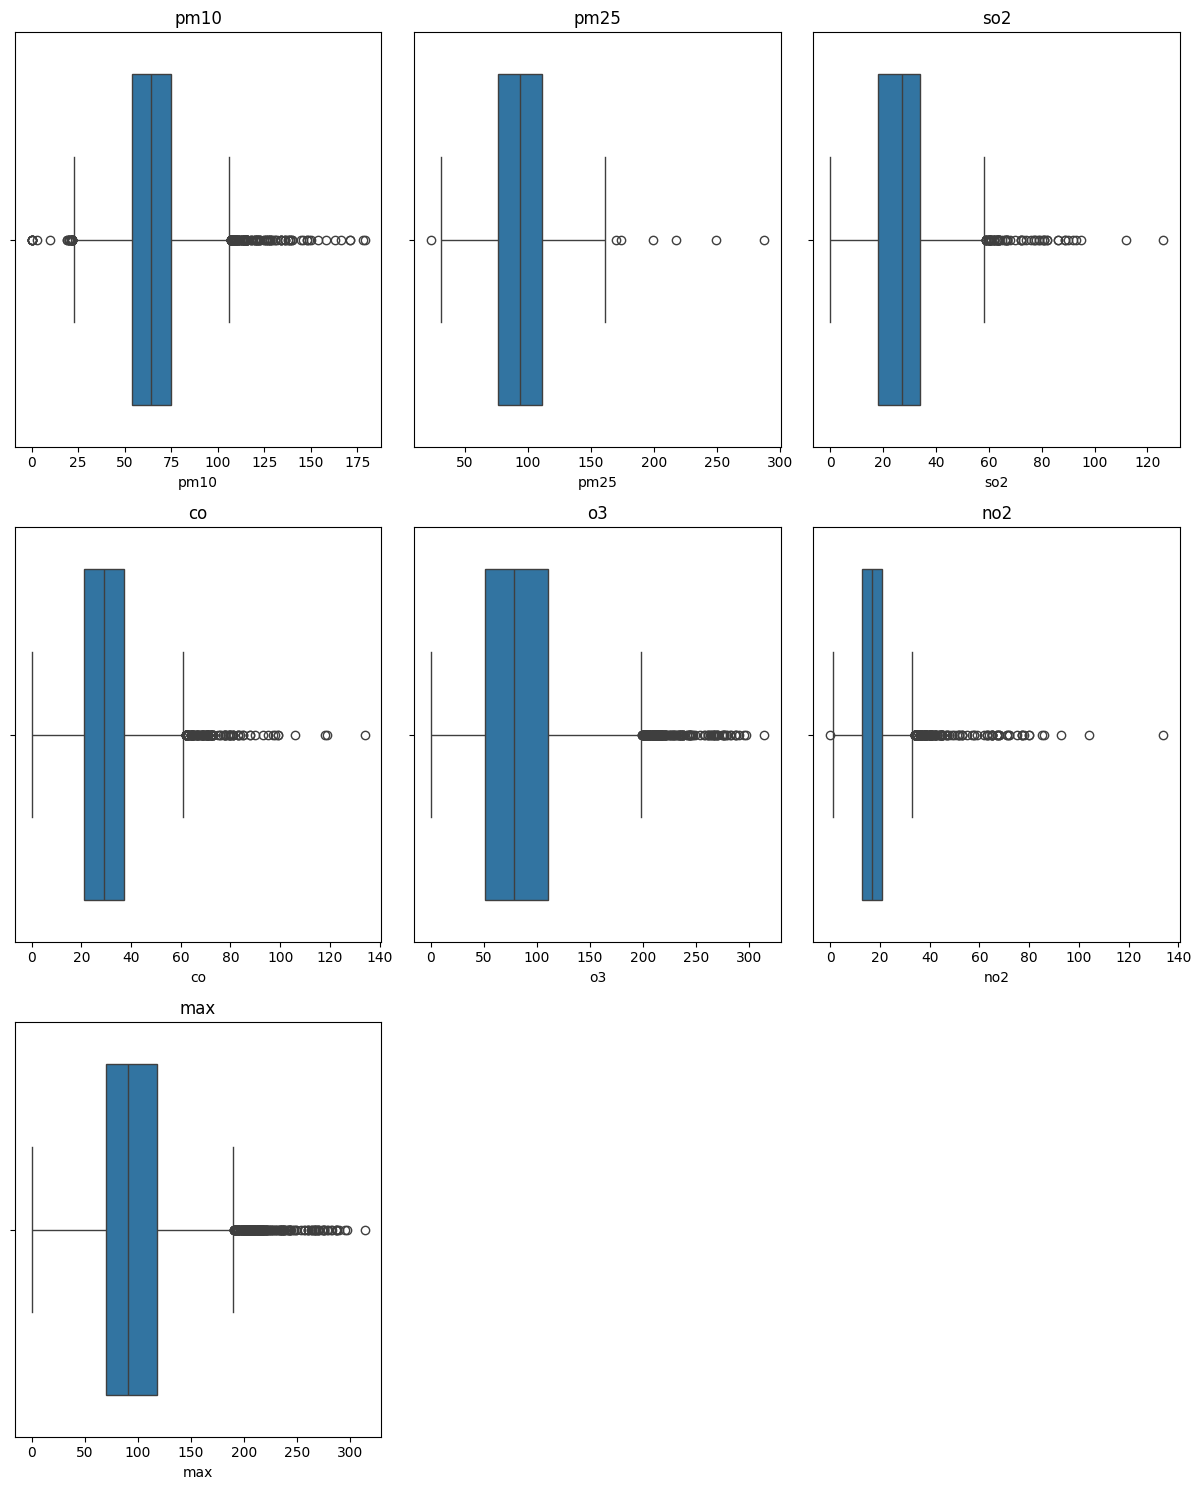

In [ ]:
num_features = df.select_dtypes(include=['number']).columns

num_plots = len(num_features)
cols = 3
rows = (num_plots // cols) + (num_plots % cols > 0)
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 5 * rows))
axes = axes.flatten()

for i, feature in enumerate(num_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(feature)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

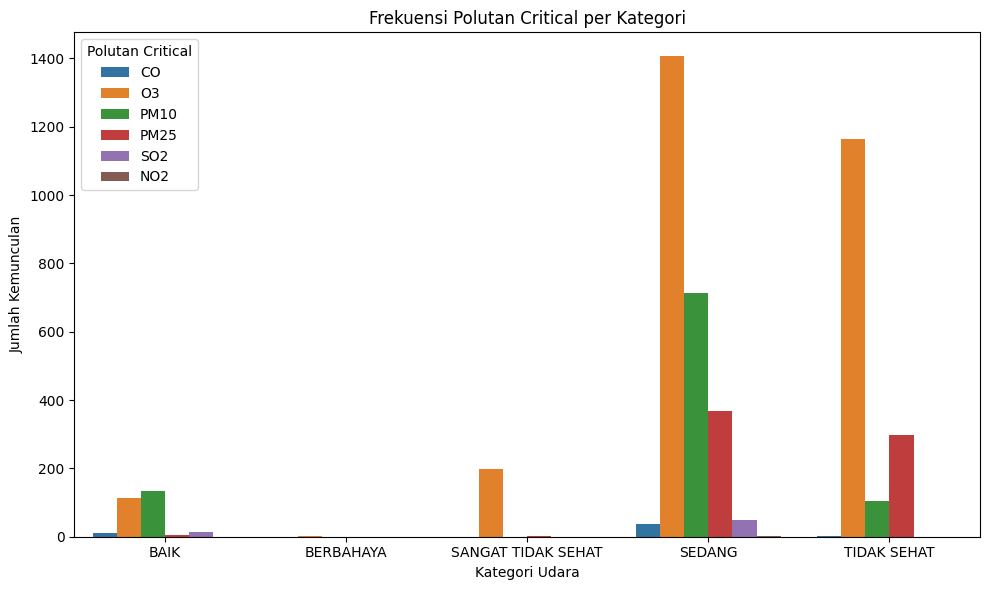

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung frekuensi critical untuk setiap categori
data_agg = df.groupby(['categori', 'critical']).size().reset_index(name='jumlah')

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=data_agg, x='categori', y='jumlah', hue='critical')
plt.title('Frekuensi Polutan Critical per Kategori')
plt.xlabel('Kategori Udara')
plt.ylabel('Jumlah Kemunculan')
plt.legend(title='Polutan Critical')
plt.tight_layout()
plt.show()


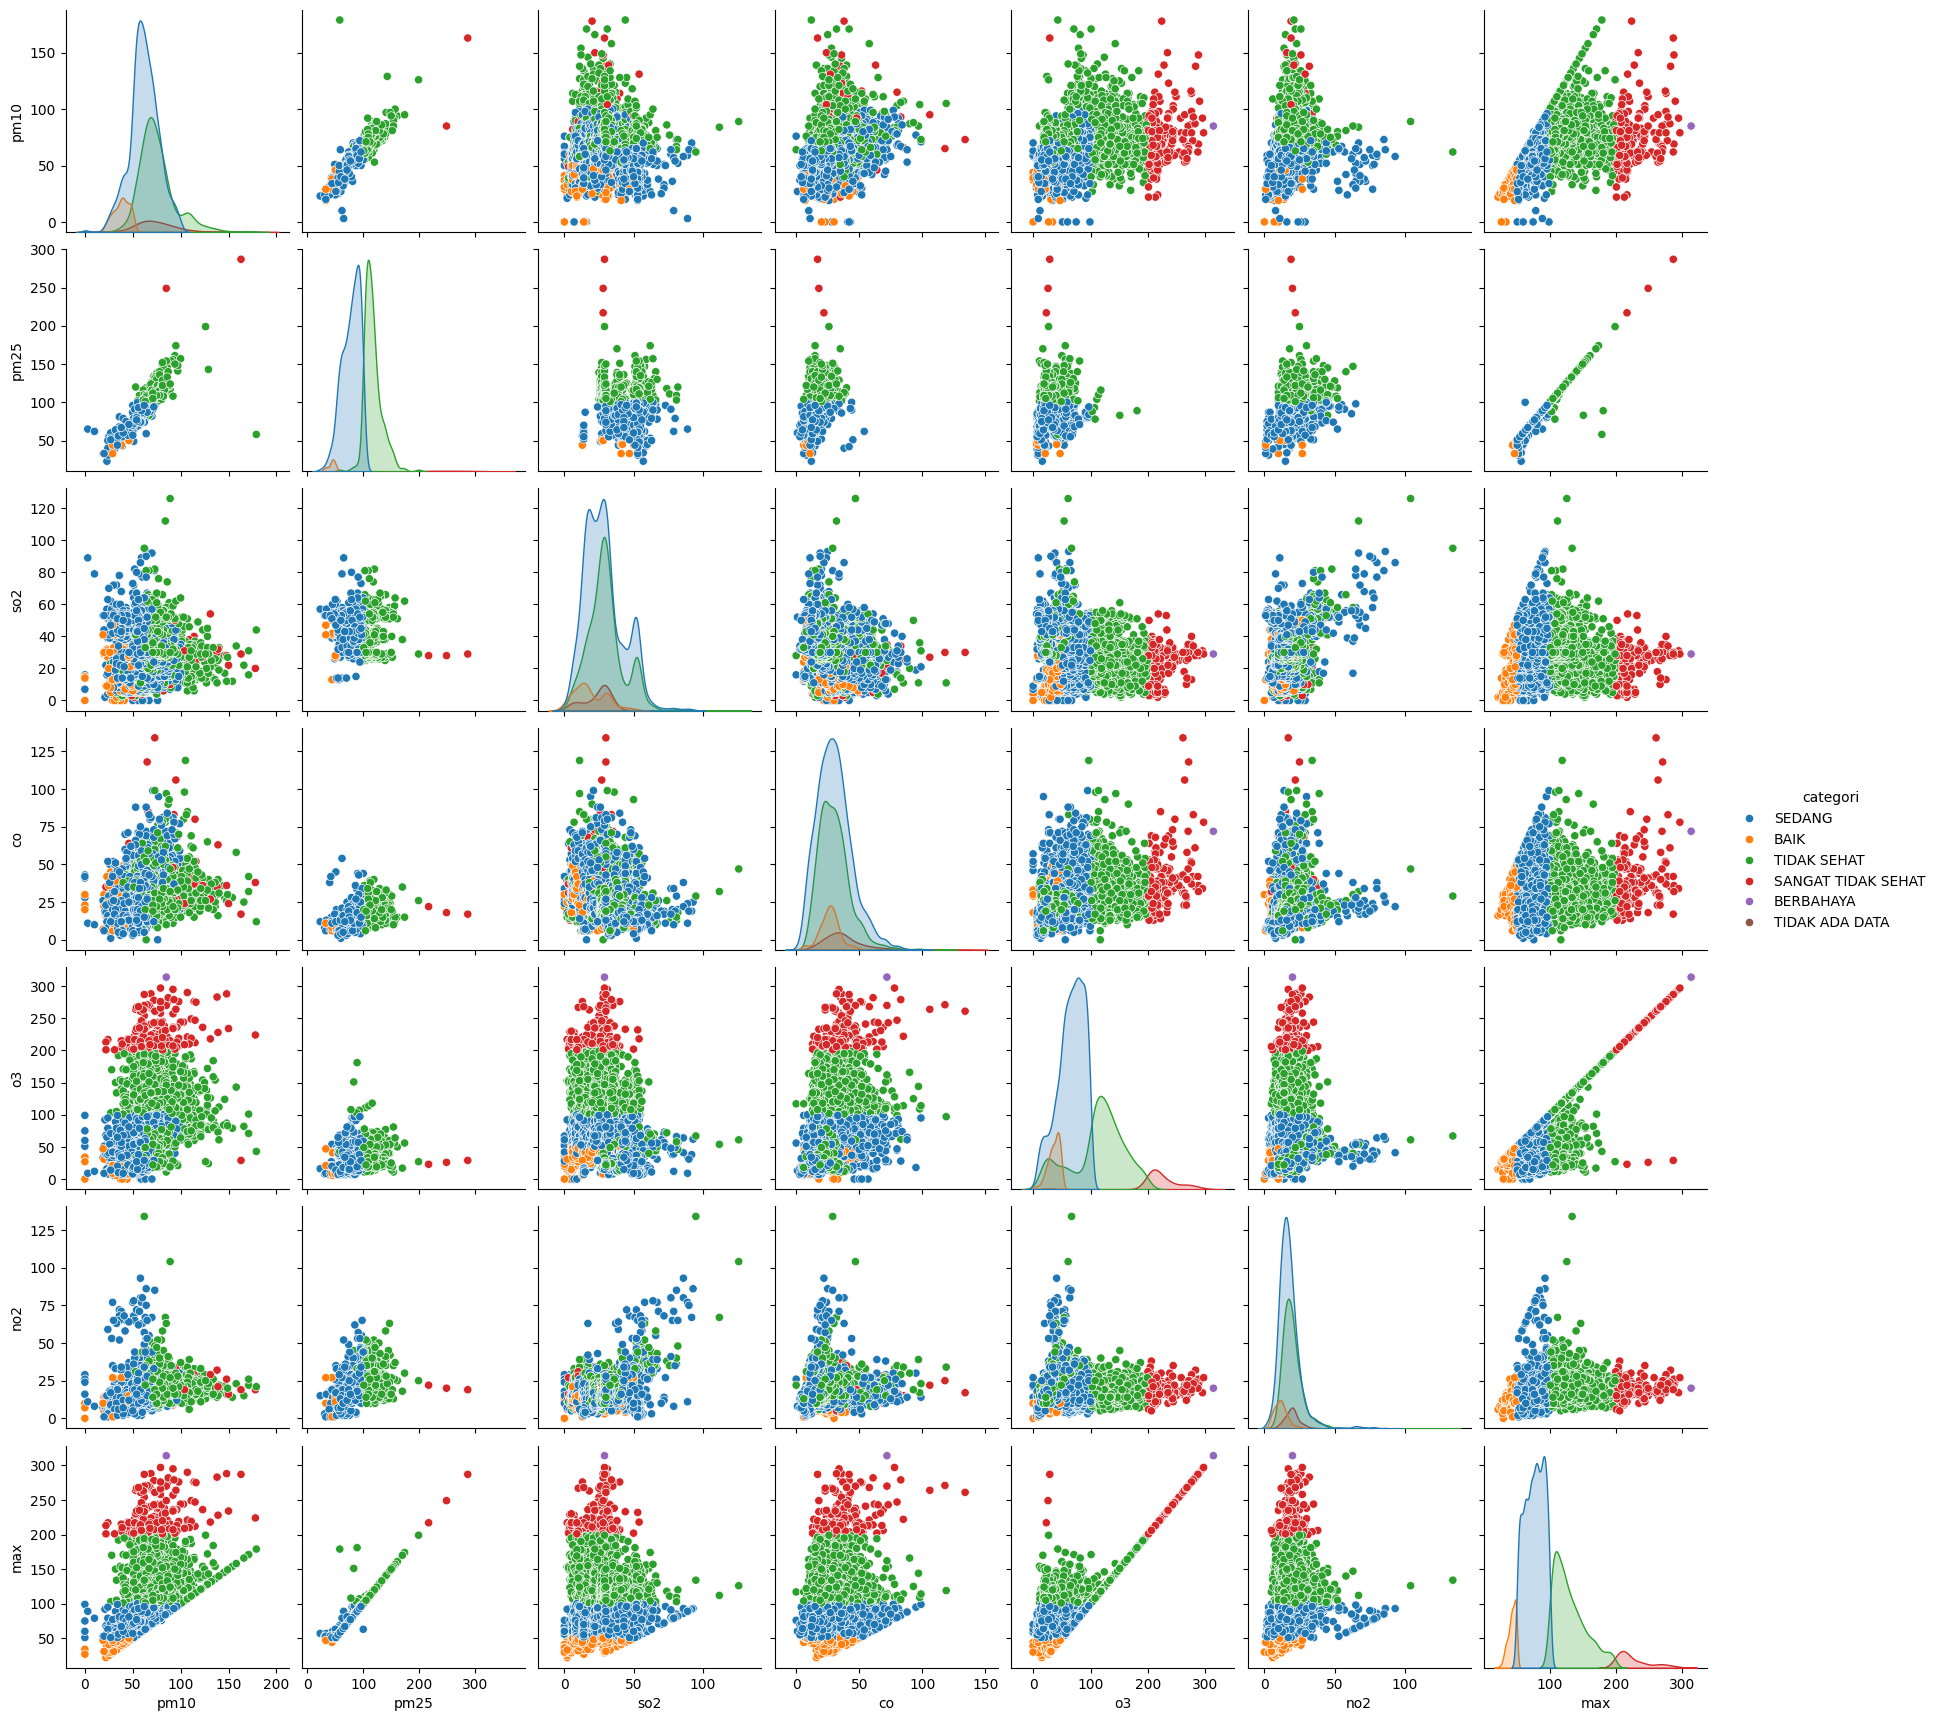

In [ ]:
sns.pairplot(df, hue='categori')
plt.show()

## prepocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4626 non-null   object 
 1   stasiun   4626 non-null   object 
 2   pm10      4466 non-null   float64
 3   pm25      723 non-null    float64
 4   so2       4607 non-null   float64
 5   co        4618 non-null   float64
 6   o3        4621 non-null   float64
 7   no2       4618 non-null   float64
 8   max       4626 non-null   float64
 9   critical  4625 non-null   object 
 10  categori  4626 non-null   object 
dtypes: float64(7), object(4)
memory usage: 397.7+ KB


### menghapus label yang hanya ada 1 baris

In [ ]:
df['categori'].value_counts()

categori
SEDANG                2574
TIDAK SEHAT           1568
BAIK                   280
SANGAT TIDAK SEHAT     202
BERBAHAYA                1
TIDAK ADA DATA           1
Name: count, dtype: int64

In [ ]:
df = df[df['categori'] != 'BERBAHAYA']
df = df[df['categori'] != 'TIDAK ADA DATA']
df['categori'].value_counts()


categori
SEDANG                2574
TIDAK SEHAT           1568
BAIK                   280
SANGAT TIDAK SEHAT     202
Name: count, dtype: int64

In [ ]:
df.shape

(4624, 11)

###  handling missing value

In [ ]:
df.isna().sum()

tanggal        0
stasiun        0
pm10         159
pm25        3901
so2           18
co             7
o3             4
no2            7
max            0
critical       0
categori       0
dtype: int64

In [ ]:
df.drop(['critical','max','tanggal','stasiun','pm25'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4624 entries, 0 to 4625
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm10      4465 non-null   float64
 1   so2       4606 non-null   float64
 2   co        4617 non-null   float64
 3   o3        4620 non-null   float64
 4   no2       4617 non-null   float64
 5   categori  4624 non-null   object 
dtypes: float64(5), object(1)
memory usage: 252.9+ KB


In [ ]:
df.isna().sum()


pm10        159
so2          18
co            7
o3            4
no2           7
categori      0
dtype: int64

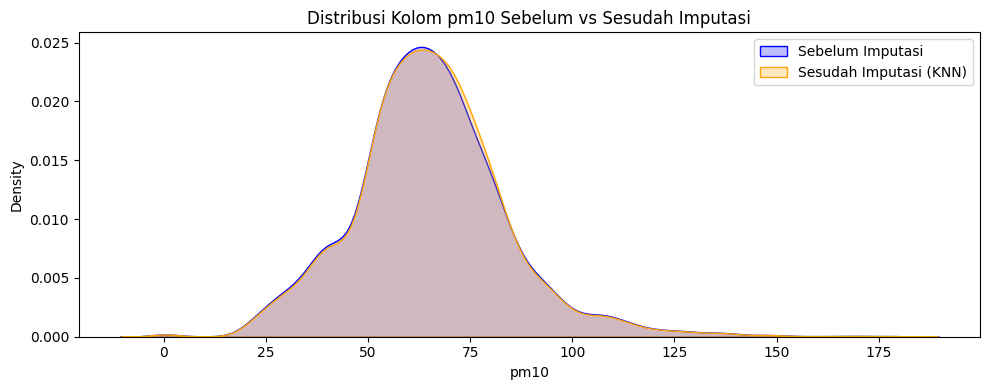

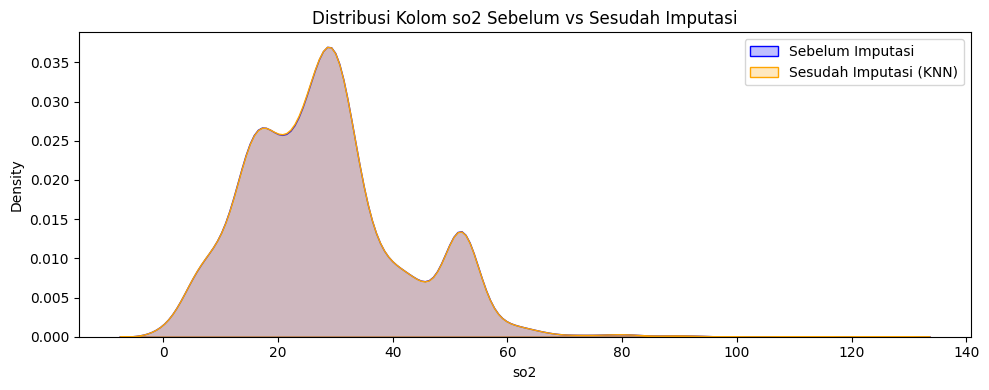

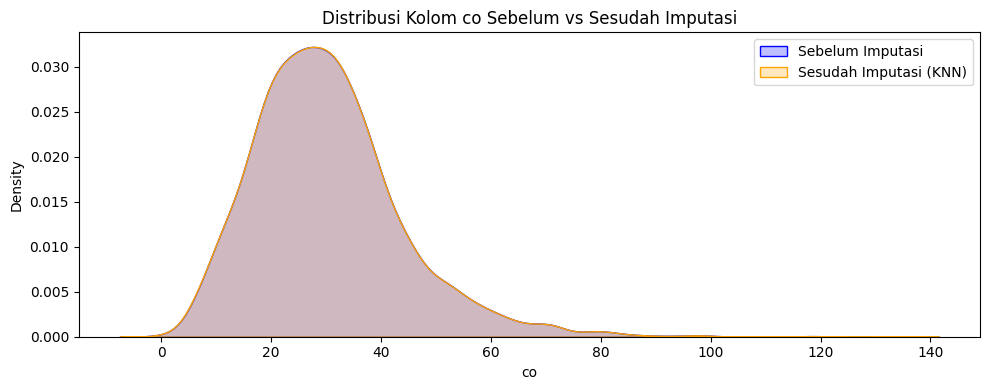

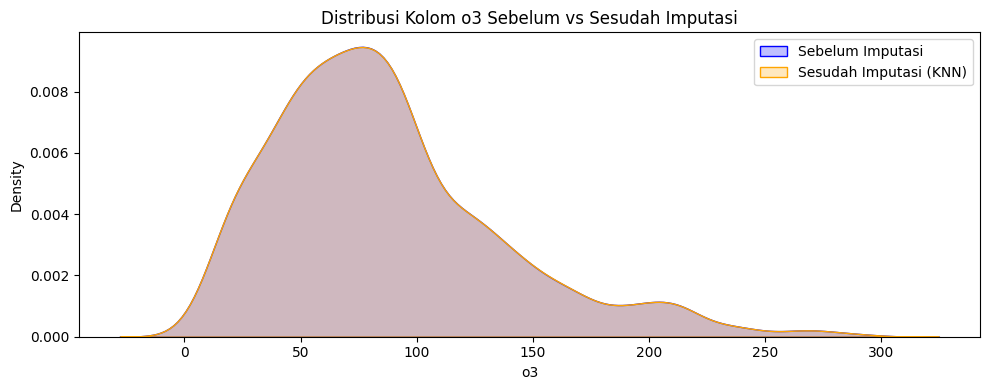

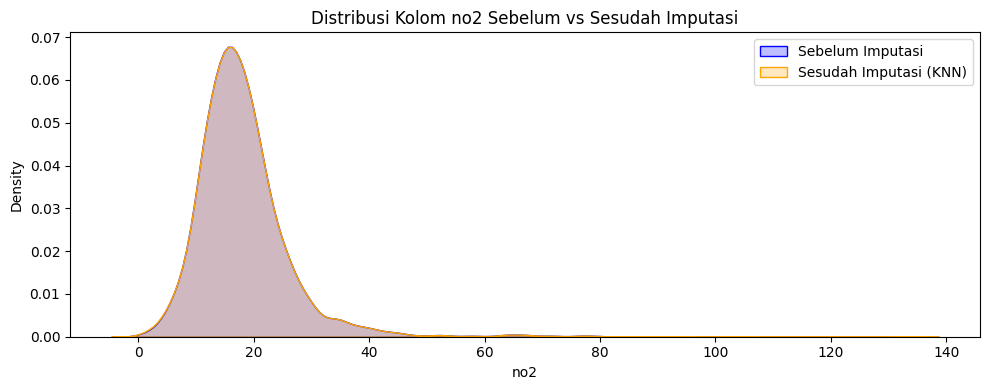

In [ ]:

columns_with_missing_values = ['pm10', 'so2', 'co', 'o3', 'no2']
df_original = df.copy()

# Imputasi dengan KNN
imputer = KNNImputer(n_neighbors=3)
df_imputed = df.copy()
df_imputed[columns_with_missing_values] = imputer.fit_transform(df_imputed[columns_with_missing_values])

# Visualisasi distribusi
for col in columns_with_missing_values:
    plt.figure(figsize=(10, 4))

    sns.kdeplot(data=df_original[col], label='Sebelum Imputasi', color='blue', fill=True)
    sns.kdeplot(data=df_imputed[col], label='Sesudah Imputasi (KNN)', color='orange', fill=True)

    plt.title(f'Distribusi Kolom {col} Sebelum vs Sesudah Imputasi')
    plt.legend()
    plt.tight_layout()
    plt.show()


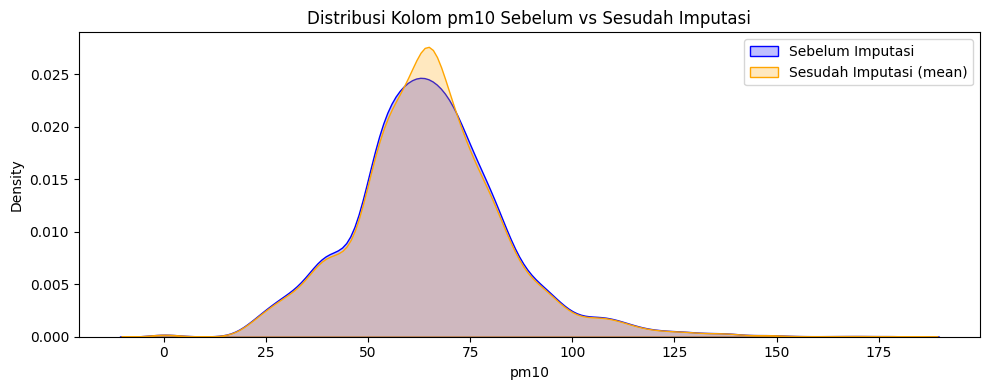

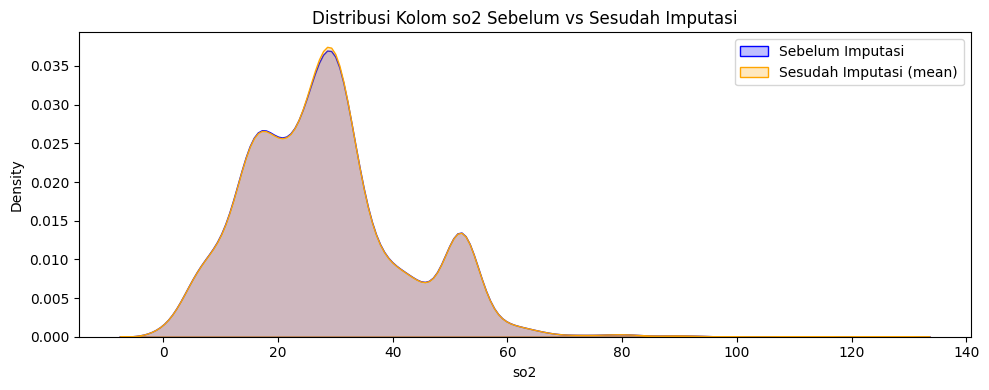

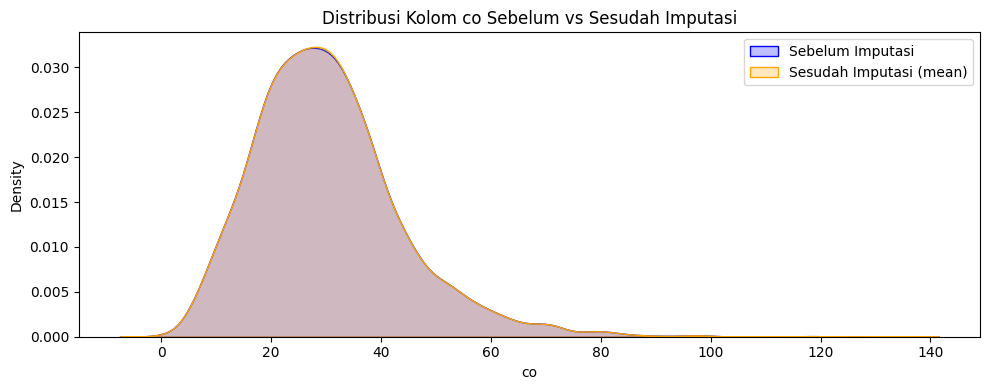

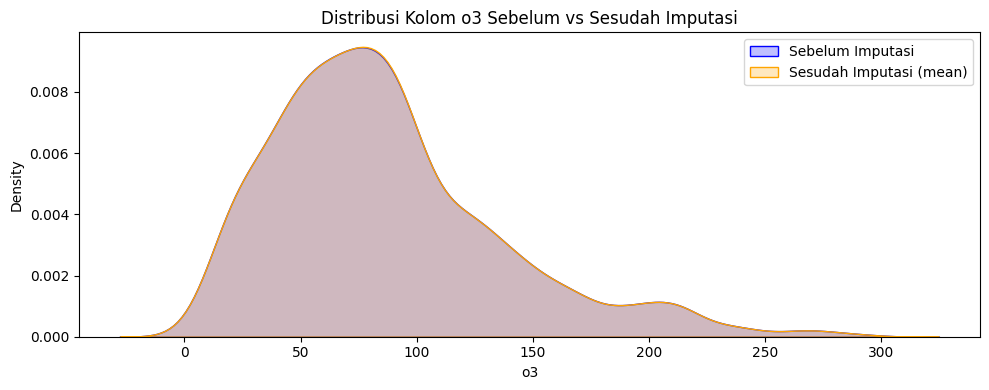

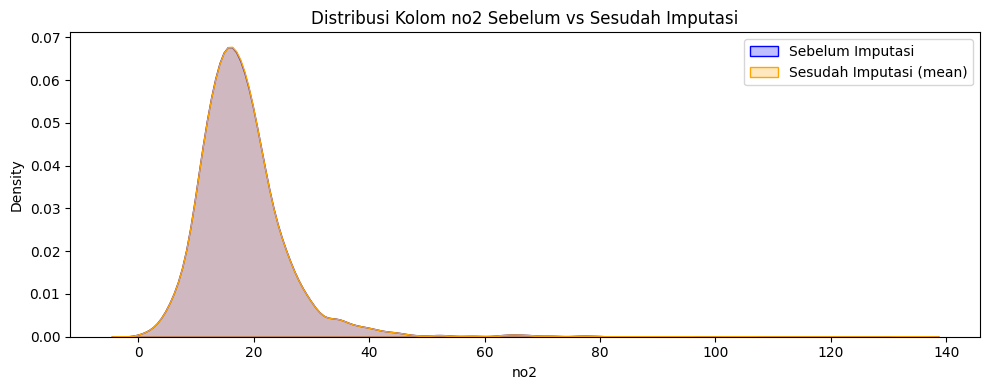

In [ ]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
df_original = df.copy()
df_mean_imputed = df.copy()
columns_with_missing_values = ['pm10', 'so2', 'co', 'o3', 'no2']
df_mean_imputed[columns_with_missing_values] = mean_imputer.fit_transform(df_mean_imputed[columns_with_missing_values])

# Visualisasi distribusi
for col in columns_with_missing_values:
    plt.figure(figsize=(10, 4))

    sns.kdeplot(data=df_original[col], label='Sebelum Imputasi', color='blue', fill=True)
    sns.kdeplot(data=df_mean_imputed[col], label='Sesudah Imputasi (mean)', color='orange', fill=True)

    plt.title(f'Distribusi Kolom {col} Sebelum vs Sesudah Imputasi')
    plt.legend()
    plt.tight_layout()
    plt.show()


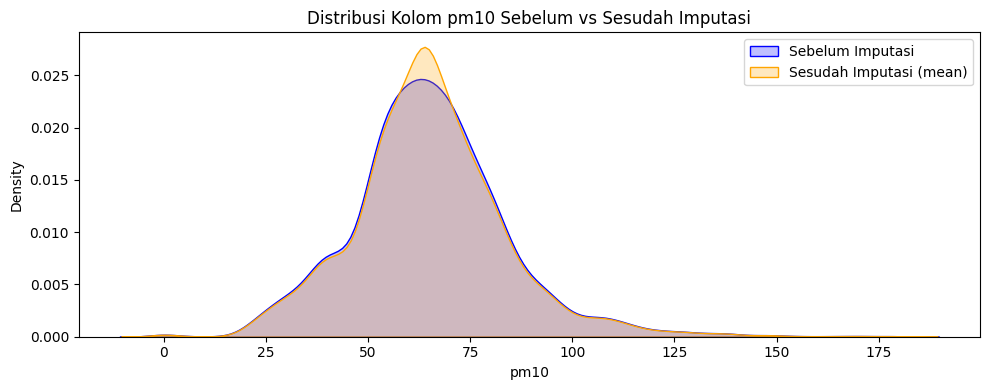

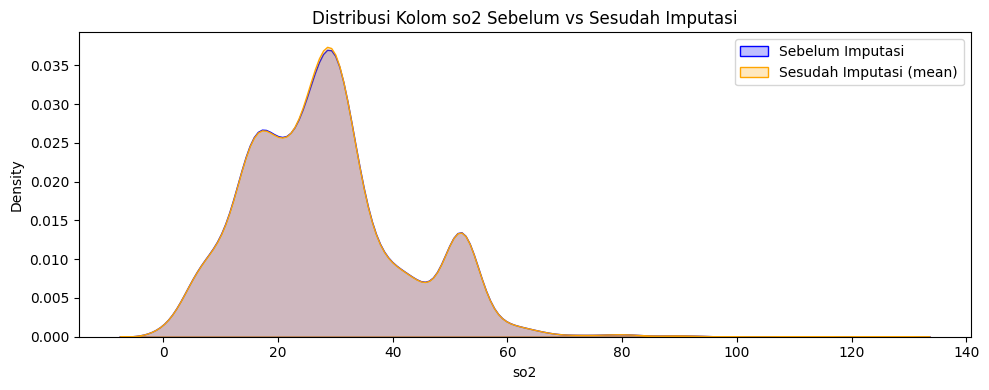

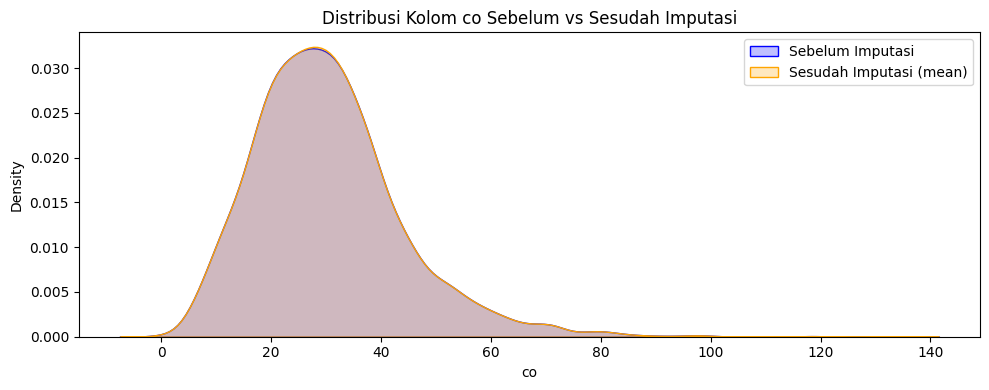

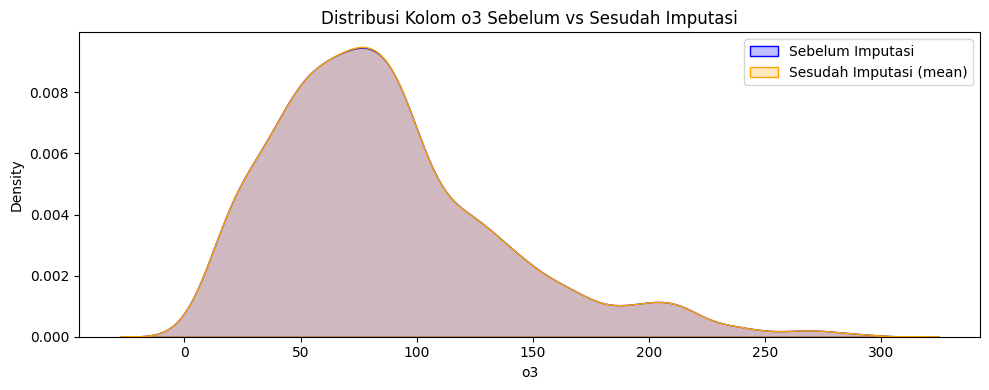

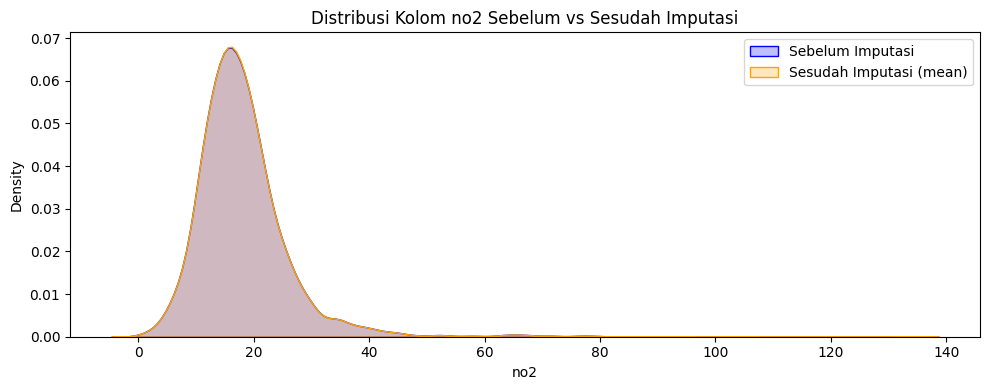

In [ ]:
mean_imputer = SimpleImputer(strategy='median')
df_original = df.copy()
df_mean_imputed = df.copy()
columns_with_missing_values = ['pm10', 'so2', 'co', 'o3', 'no2']
df_mean_imputed[columns_with_missing_values] = mean_imputer.fit_transform(df_mean_imputed[columns_with_missing_values])

# Visualisasi distribusi
for col in columns_with_missing_values:
    plt.figure(figsize=(10, 4))

    sns.kdeplot(data=df_original[col], label='Sebelum Imputasi', color='blue', fill=True)
    sns.kdeplot(data=df_mean_imputed[col], label='Sesudah Imputasi (mean)', color='orange', fill=True)

    plt.title(f'Distribusi Kolom {col} Sebelum vs Sesudah Imputasi')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
imputer = KNNImputer(n_neighbors=3)
columns_with_missing_values = ['pm10', 'so2', 'co', 'o3', 'no2']
df[columns_with_missing_values] = imputer.fit_transform(df[columns_with_missing_values])

In [ ]:
df.isna().sum()

pm10        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64

## Train test split

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['categori'] = encoder.fit_transform(df['categori'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4624 entries, 0 to 4625
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm10      4624 non-null   float64
 1   so2       4624 non-null   float64
 2   co        4624 non-null   float64
 3   o3        4624 non-null   float64
 4   no2       4624 non-null   float64
 5   categori  4624 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 252.9 KB


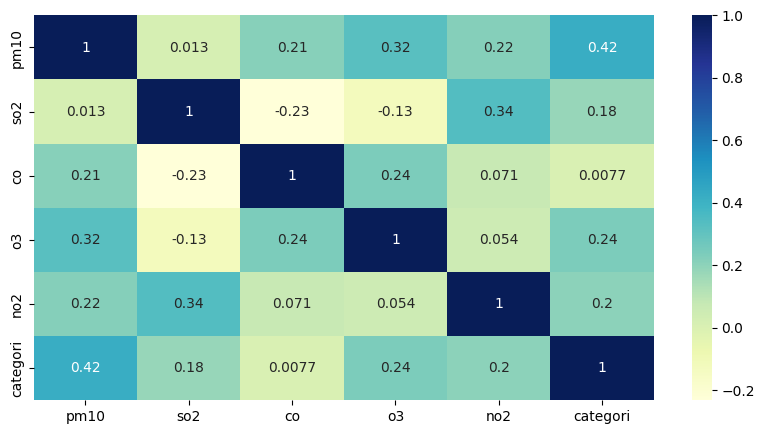

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()


In [ ]:
X = df.drop('categori', axis=1).values
y = df['categori'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X

array([[60.,  4., 73., 27., 14.],
       [32.,  2., 16., 33.,  9.],
       [27.,  2., 19., 20.,  9.],
       ...,
       [62., 45., 15., 29., 34.],
       [71., 30., 19., 22., 14.],
       [38., 43., 12., 34., 34.]])

## MANUAL

Training 0 vs 1
Training 0 vs 2
Training 0 vs 3
Training 1 vs 2
Training 1 vs 3
Training 2 vs 3
=== Classification Report ===
                    precision    recall  f1-score   support

              BAIK       0.56      0.48      0.52        62
SANGAT TIDAK SEHAT       0.25      1.00      0.39        43
            SEDANG       0.85      0.48      0.61       511
       TIDAK SEHAT       0.62      0.83      0.71       309

          accuracy                           0.62       925
         macro avg       0.57      0.70      0.56       925
      weighted avg       0.73      0.62      0.63       925

F1 Score: 0.626824527447573
F1 Score: 0.5577104975484053
=== Confusion Matrix ===


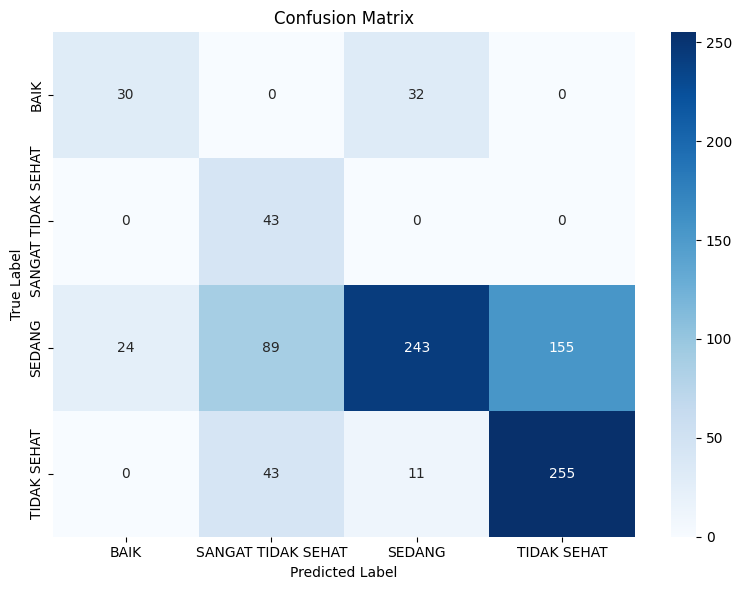

In [ ]:
#-----------------------
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from itertools import combinations
from collections import Counter

np.random.seed(42)

class SVM_SMO:
    def __init__(self, C=1.0, tol=1e-3, max_passes=5, kernel='linear', degree=3, coef0=1):
        self.C = C
        self.tol = tol
        self.max_passes = max_passes
        self.kernel_type = kernel
        self.degree = degree
        self.coef0 = coef0

    def kernel(self, X1, X2):
        if self.kernel_type == 'linear':
            return np.dot(X1, X2.T)
        elif self.kernel_type == 'poly':
            return (np.dot(X1, X2.T) + self.coef0) ** self.degree
        else:
            raise ValueError("Kernel tidak tersedia")

    def compute_kernel_matrix(self, X):
        return self.kernel(X, X)

    def decision_function(self, i):
        return np.dot(self.alpha * self.y, self.K[:, i]) + self.b

    def error(self, i):
        return self.decision_function(i) - self.y[i]

    def take_step(self, i1, i2):
        if i1 == i2:
            return 0
        alpha1 = self.alpha[i1]
        alpha2 = self.alpha[i2]
        y1 = self.y[i1]
        y2 = self.y[i2]
        E1 = self.errors[i1]
        E2 = self.errors[i2]
        s = y1 * y2

        if y1 != y2:
            L = max(0, alpha2 - alpha1)
            H = min(self.C, self.C + alpha2 - alpha1)
        else:
            L = max(0, alpha2 + alpha1 - self.C)
            H = min(self.C, alpha2 + alpha1)
        if L == H:
            return 0

        k11 = self.K[i1, i1]
        k12 = self.K[i1, i2]
        k22 = self.K[i2, i2]
        eta = k11 + k22 - 2 * k12

        if eta > 0:
            a2 = alpha2 + y2 * (E1 - E2) / eta
            if a2 < L:
                a2 = L
            elif a2 > H:
                a2 = H
        else:
            f1 = y1 * (E1 + self.b) - alpha1 * k11 - s * alpha2 * k12
            f2 = y2 * (E2 + self.b) - alpha2 * k22 - s * alpha1 * k12
            Lobj = (alpha1 + s * (alpha2 - L)) * f1 + L * f2 + 0.5 * (alpha1 + s * (alpha2 - L)) ** 2 * k11 + 0.5 * L ** 2 * k22 + s * (alpha1 + s * (alpha2 - L)) * L * k12
            Hobj = (alpha1 + s * (alpha2 - H)) * f1 + H * f2 + 0.5 * (alpha1 + s * (alpha2 - H)) ** 2 * k11 + 0.5 * H ** 2 * k22 + s * (alpha1 + s * (alpha2 - H)) * H * k12
            if Lobj < Hobj - 1e-3:
                a2 = L
            elif Lobj > Hobj + 1e-3:
                a2 = H
            else:
                a2 = alpha2

        if abs(a2 - alpha2) < self.tol * (a2 + alpha2 + self.tol):
            return 0
        a1 = alpha1 + s * (alpha2 - a2)

        #update treshold
        b1 = self.b - E1 - y1 * (a1 - alpha1) * k11 - y2 * (a2 - alpha2) * k12
        b2 = self.b - E2 - y1 * (a1 - alpha1) * k12 - y2 * (a2 - alpha2) * k22
        if 0 < a1 < self.C:
            self.b = b1
        elif 0 < a2 < self.C:
            self.b = b2
        else:
            self.b = (b1 + b2) / 2

        #update eror cache
        self.alpha[i1] = a1
        self.alpha[i2] = a2
        self.errors[i1] = self.error(i1)
        self.errors[i2] = self.error(i2)

        return 1

    def examine_example(self, i2):
        y2 = self.y[i2]
        alpha2 = self.alpha[i2]
        E2 = self.errors[i2]
        r2 = E2 * y2

        if (r2 < -self.tol and alpha2 < self.C) or (r2 > self.tol and alpha2 > 0):
            non_bound = np.where((self.alpha != 0) & (self.alpha != self.C))[0]
            if len(non_bound) > 1:
                i1 = np.argmax(np.abs(self.errors - E2))
                if self.take_step(i1, i2):
                  return 1
            for i1 in np.random.permutation(non_bound):
                if self.take_step(i1, i2):
                   return 1
            for i1 in np.random.permutation(len(self.alpha)):
                if self.take_step(i1, i2):
                  return 1
        return 0

    def fit(self, X, y):
        self.X = X
        self.y = y.astype(float)
        self.alpha = np.zeros(len(y))
        self.b = 0
        self.K = self.compute_kernel_matrix(X)
        self.errors = -self.y.copy()
        passes = 0
        examine_all = True

        while passes < self.max_passes:
            num_changed = 0
            if examine_all:
                for i in range(len(self.y)):
                    num_changed += self.examine_example(i)
            else:
                non_bound = np.where((self.alpha != 0) & (self.alpha != self.C))[0]
                for i in non_bound:
                    num_changed += self.examine_example(i)
            # print(f"Pass {passes+1}, number changed: {num_changed}")
            if num_changed == 0:
              passes = passes + 1
              examine_all = not examine_all
            else:
              passes = 0

    def predict(self, X_test):
        K_test = self.kernel(X_test, self.X)
        return np.sign(np.dot((self.alpha * self.y), K_test.T) + self.b)



class OneVsOneSVM:
    def __init__(self, **kwargs):
        self.kwargs = kwargs
        self.models = []
        self.class_pairs = []

    def fit(self, X, y):
        self.classes = np.unique(y)
        for cls1, cls2 in combinations(self.classes, 2):
            idx = np.where((y == cls1) | (y == cls2))[0]
            X_pair = X[idx]
            y_pair = y[idx]
            y_binary = np.where(y_pair == cls1, 1, -1)

            print(f"Training {cls1} vs {cls2}")
            model = SVM_SMO(**self.kwargs)
            model.fit(X_pair, y_binary)

            self.models.append((model, cls1, cls2))
            self.class_pairs.append((cls1, cls2))

    def predict(self, X):
        votes = np.zeros((X.shape[0], len(self.classes)))

        for model, cls1, cls2 in self.models:
            pred = model.predict(X)
            for i, p in enumerate(pred):
                if p == 1:
                    votes[i, cls1] += 1
                else:
                    votes[i, cls2] += 1

        return np.argmax(votes, axis=1)

# # === PREPROCESSING DATASET ISPU ===
# df = pd.read_csv('/content/drive/Shareddrives/projek pmd sem 4/dataset projek pmd/ispu_dki_all.csv')

# df = df[df['categori'].isin(['BAIK', 'SEDANG', 'TIDAK SEHAT', 'SANGAT TIDAK SEHAT'])]
# df = df[['pm10', 'so2', 'co', 'o3', 'no2', 'categori']].copy()

# imputer = KNNImputer(n_neighbors= 3)
# df.loc[:, ['pm10', 'so2', 'co', 'o3', 'no2']] = imputer.fit_transform(df[['pm10', 'so2', 'co', 'o3', 'no2']])

# encoder = LabelEncoder()
# df['categori'] = encoder.fit_transform(df['categori'])

# X = df.drop('categori', axis=1).values
# y = df['categori'].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Buat scaler dan fit_transform di data train
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
# # === TRAINING ===
model_svm = OneVsOneSVM(C=1, kernel='poly',degree= 3)
model_svm.fit(X_train_scaled, y_train)

# === EVALUASI ===
y_pred = model_svm.predict(X_test_scaled)
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

# F1 Score
score = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", score)


score = f1_score(y_test, y_pred, average='macro')
print("F1 Score:", score)

print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

saved_model = {
    'model': model_svm,
    'scaler': scaler,
    'encoder': encoder,
    'imputer': imputer,
}

# Simpan ke file
joblib.dump(saved_model, 'models/svm_ovo_smo.joblib')


## IMPORT

### OVO

In [ ]:
line_ovo = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
line_pred_ovo = line_ovo.predict(X_test)
line_accuracy = accuracy_score(y_test, line_pred_ovo)
line_f1 = f1_score(y_test, line_pred_ovo, average='weighted')
print('Accuracy (line Kernel): ', "%.2f" % (line_accuracy*100))
print('F1 (line Kernel): ', "%.2f" % (line_f1*100))


Accuracy (line Kernel):  83.68
F1 (line Kernel):  83.50


In [ ]:
rbf_ovo = svm.SVC(kernel='rbf', gamma=0.5, C=1 , decision_function_shape='ovo').fit(X_train, y_train)
rbf_pred_ovo = rbf_ovo.predict(X_test)
rbf_accuracy = accuracy_score(y_test, rbf_pred_ovo)
rbf_f1 = f1_score(y_test, rbf_pred_ovo, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))
print('\n')



Accuracy (RBF Kernel):  55.14
F1 (RBF Kernel):  39.27




In [ ]:
poly_ovo = svm.SVC(kernel='poly', degree=3, C=1,decision_function_shape='ovo').fit(X_train, y_train)
poly_pred_ovo = poly_ovo.predict(X_test)
poly_accuracy_ovo = accuracy_score(y_test, poly_pred_ovo)
poly_f1_ovo = f1_score(y_test, poly_pred_ovo, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy_ovo*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1_ovo*100))
print('\n')



Accuracy (Polynomial Kernel):  91.78
F1 (Polynomial Kernel):  91.79




### OVR

In [ ]:
line_ovr = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr').fit(X_train, y_train)
line_pred_ovr = line_ovr.predict(X_test)
line_accuracy = accuracy_score(y_test, line_pred_ovr)
line_f1 = f1_score(y_test, line_pred_ovr, average='weighted')
print('Accuracy (line Kernel): ', "%.2f" % (line_accuracy*100))
print('F1 (line Kernel): ', "%.2f" % (line_f1*100))


Accuracy (line Kernel):  83.68
F1 (line Kernel):  83.50


In [ ]:
rbf_ovr = svm.SVC(kernel='rbf', gamma=0.5, C=0.1 , decision_function_shape='ovr').fit(X_train, y_train)
rbf_pred_ovr = rbf_ovr.predict(X_test)
rbf_accuracy = accuracy_score(y_test, rbf_pred_ovr)
rbf_f1 = f1_score(y_test, rbf_pred_ovr, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))
print('\n')



Accuracy (RBF Kernel):  55.24
F1 (RBF Kernel):  39.32




In [ ]:
poly_ovr = svm.SVC(kernel='poly', degree=3, C=1,decision_function_shape='ovr').fit(X_train, y_train)
poly_pred_ovr = poly_ovr.predict(X_test)
poly_accuracy_ovr = accuracy_score(y_test, poly_pred_ovr)
poly_f1_ovr = f1_score(y_test, poly_pred_ovr, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy_ovr*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1_ovr*100))
print('\n')



Accuracy (Polynomial Kernel):  91.78
F1 (Polynomial Kernel):  91.79


